# Curso Estadística Descriptiva

In [80]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA

### Medidas de tendencia central

In [81]:
df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [83]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [84]:
df['price_usd'].median()

4800.0

In [85]:
df['price_usd'].mean()

6639.971021255613

<Axes: ylabel='Frequency'>

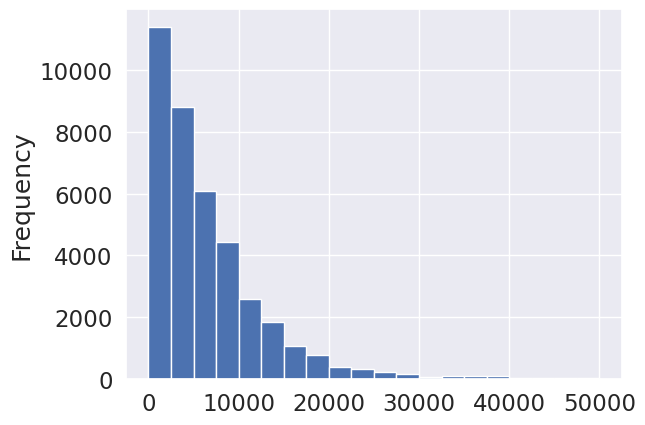

In [86]:
df['price_usd'].plot.hist(bins=20)

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


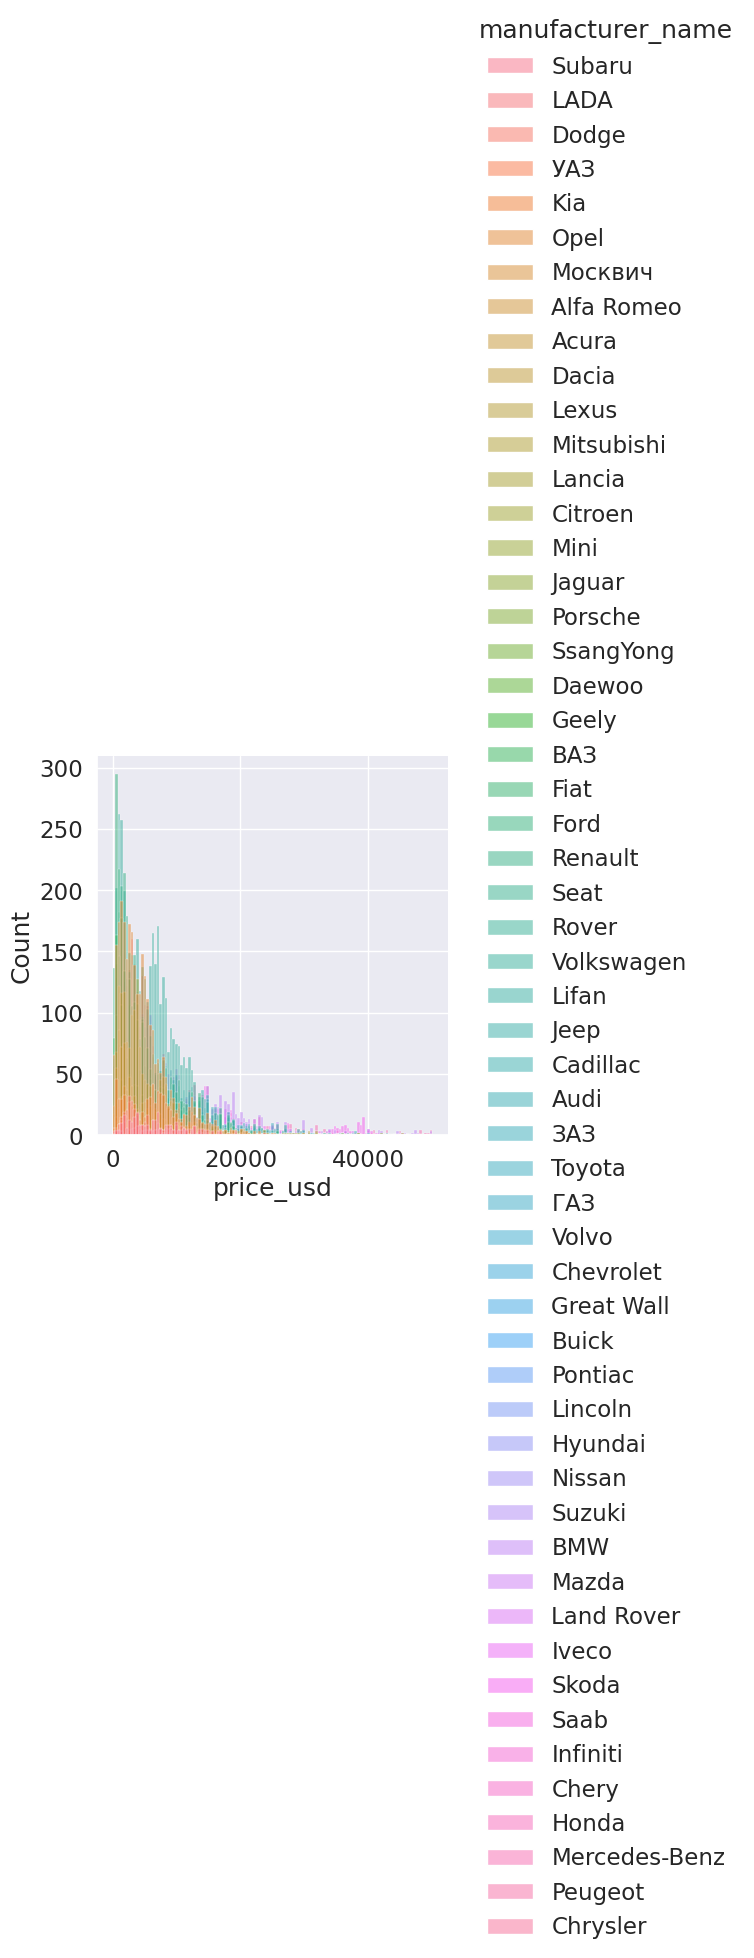

In [87]:
sns.displot(df, x = 'price_usd', hue = 'manufacturer_name')

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


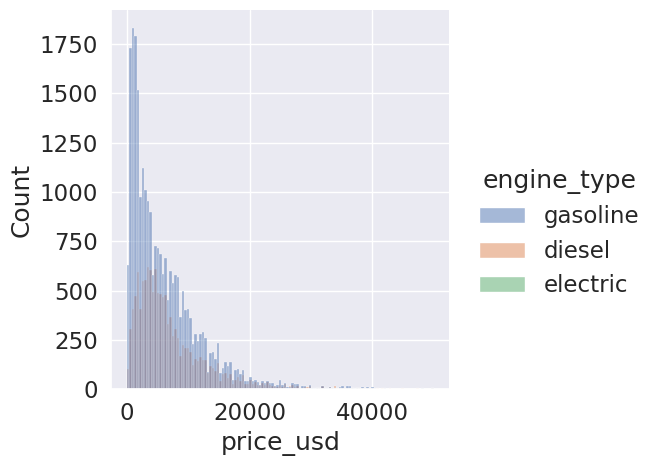

In [88]:
sns.displot(df, x="price_usd", hue="engine_type")

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


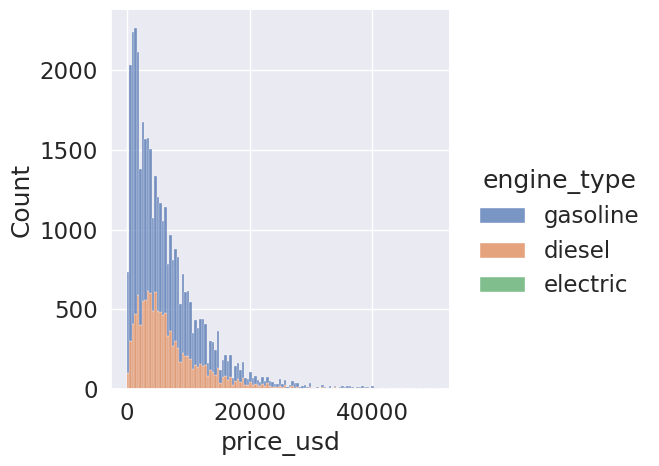

In [89]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack')

In [90]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_usd', ylabel='Count'>

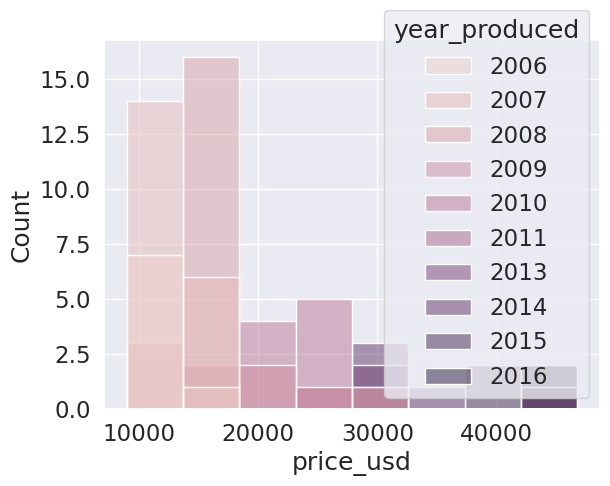

In [91]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced')

In [92]:
chevrolet_Spark=df[(df['manufacturer_name']=='Chevrolet') & (df['model_name']=='Spark')]

In [93]:
chevrolet_Spark.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
24195,Chevrolet,Spark,mechanical,other,125000,2010,gasoline,False,gasoline,1.0,...,True,False,False,False,False,False,False,False,False,50
24234,Chevrolet,Spark,mechanical,white,161000,2010,gasoline,False,gasoline,1.0,...,True,False,False,False,False,False,False,False,False,14
24248,Chevrolet,Spark,mechanical,red,52000,2010,gasoline,False,gasoline,1.0,...,False,False,False,False,False,False,False,False,False,1
24278,Chevrolet,Spark,mechanical,silver,130000,2011,gasoline,False,gasoline,1.2,...,True,False,True,False,False,False,False,True,True,9
24307,Chevrolet,Spark,mechanical,green,185000,2011,gasoline,False,gasoline,1.2,...,True,False,False,False,False,False,False,False,True,59


/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_usd', ylabel='Count'>

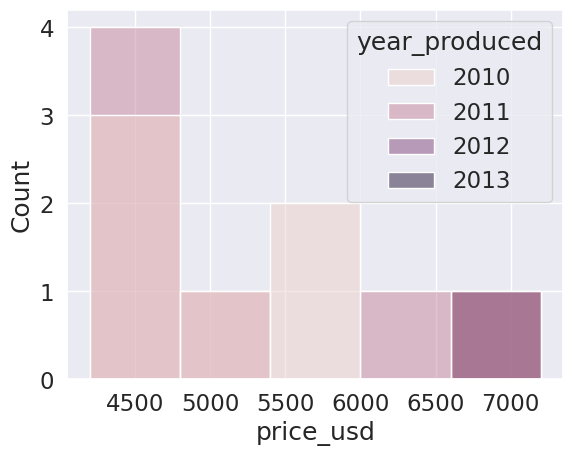

In [94]:
sns.histplot(chevrolet_Spark, x='price_usd', hue = 'year_produced')

### Medidas de dispersion en Python

In [95]:
df['price_usd'].std()

6428.152018202915

In [96]:
# Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [97]:
# Quartiles
median = df['price_usd'].median() #Q2
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0) #Q0
max_val = df['price_usd'].quantile(q=1.0) #Q4
print(min_val, Q1, median, Q3, max_val)

1.0 2100.0 4800.0 8990.0 50000.0


In [98]:
#Rango intercuartil
iqr = Q3-Q1 
iqr

6890.0

In [99]:
minlimit= Q1-1.5*iqr
maxlimit= Q1+1.5*iqr
print(minlimit,maxlimit) #En este caso no aplica pues esta no es una distribucion normal de los daros

-8235.0 12435.0


/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_usd', ylabel='Count'>

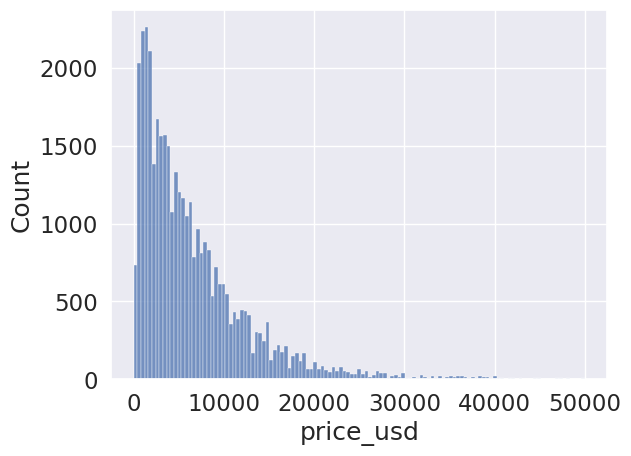

In [100]:
sns.histplot(df['price_usd'])

<Axes: >

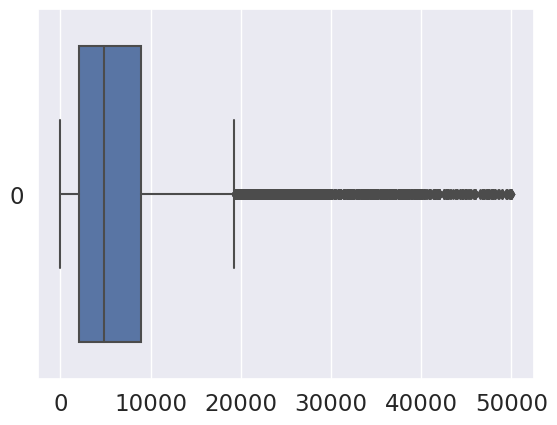

In [101]:
sns.boxplot(df['price_usd'],orient='h')

<Axes: xlabel='engine_fuel', ylabel='price_usd'>

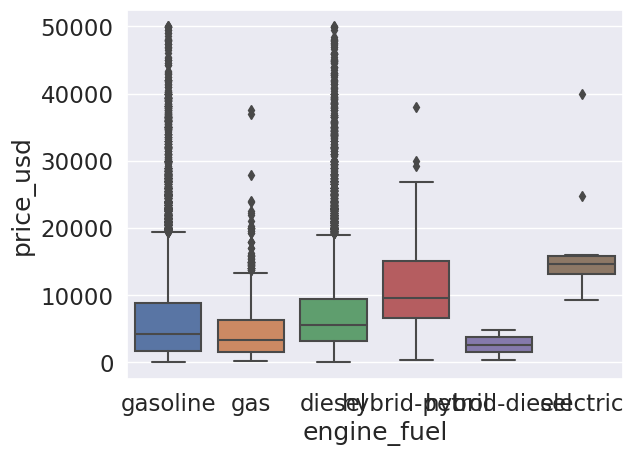

In [102]:
sns.boxplot(x='engine_fuel',y='price_usd',data=df)

### Diagramas de dispersion en análisis de datos (Ej. Flores )

In [103]:
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='petal_length'>

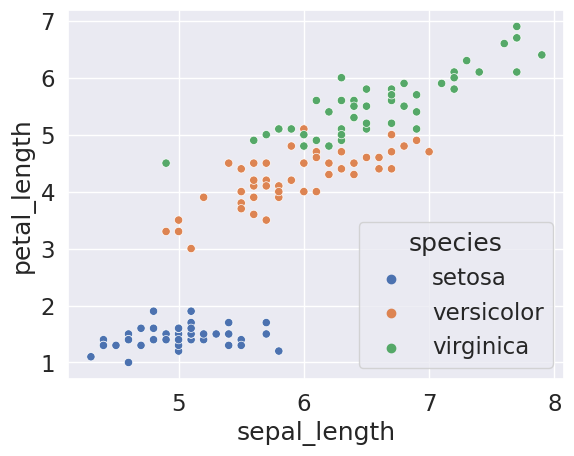

In [104]:
# scatterplot 
sns.scatterplot(data=iris, x = 'sepal_length', y = 'petal_length', hue= 'species')

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


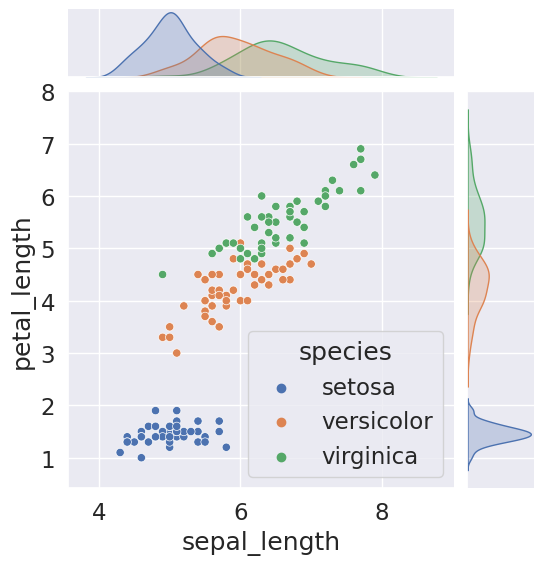

In [105]:
# joint plot
sns.jointplot(data=iris, x = 'sepal_length', y = 'petal_length', hue = 'species')

<Axes: xlabel='species', ylabel='sepal_length'>

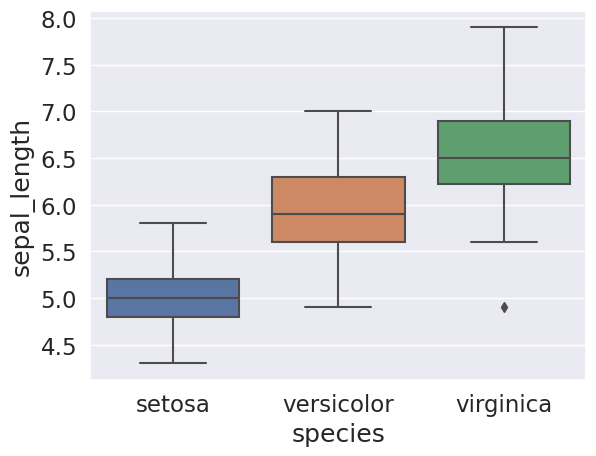

In [106]:
# box plot 
sns.boxplot(x = 'species', y = 'sepal_length', data = iris)

<Axes: xlabel='species', ylabel='sepal_length'>

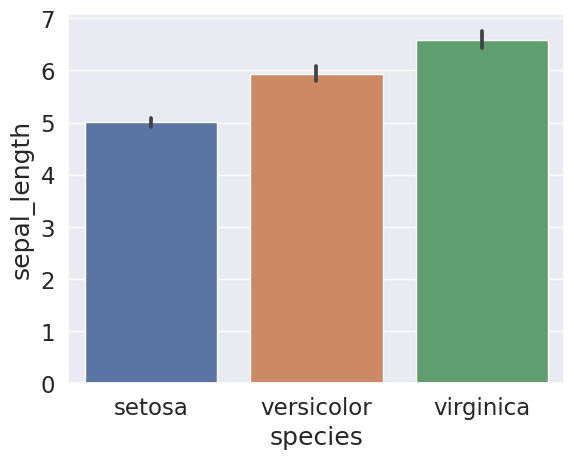

In [107]:
#Barplot
sns.barplot(x = 'species', y = 'sepal_length', data = iris)

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

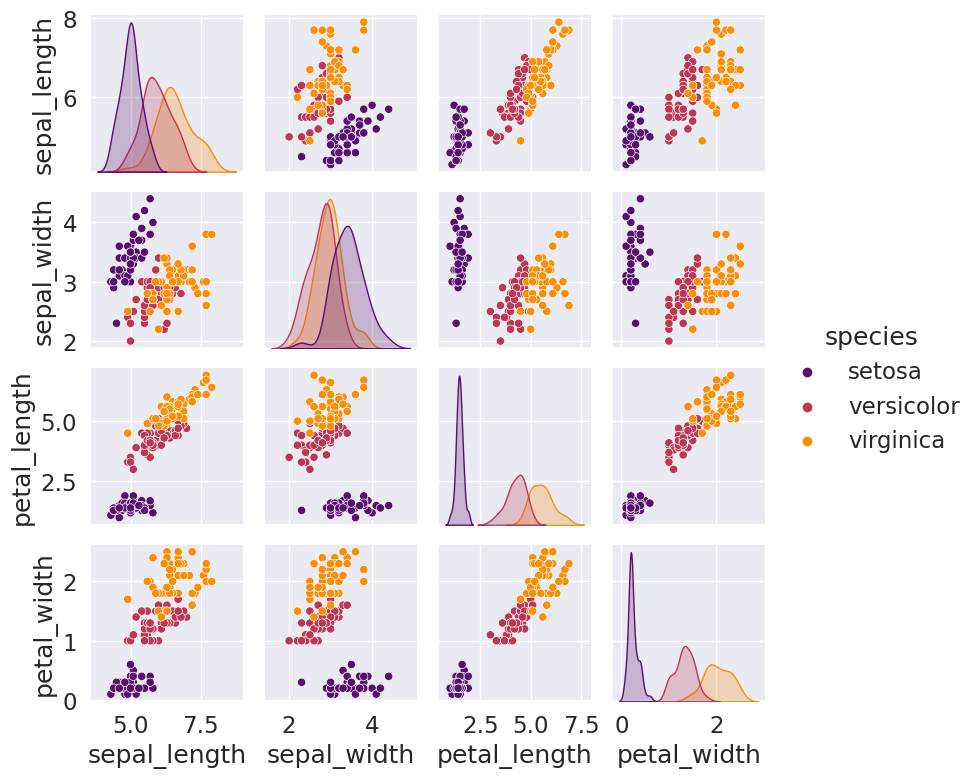

In [108]:
sns.pairplot(iris, hue='species',palette='inferno', diag_kind='kde', height=2.0)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

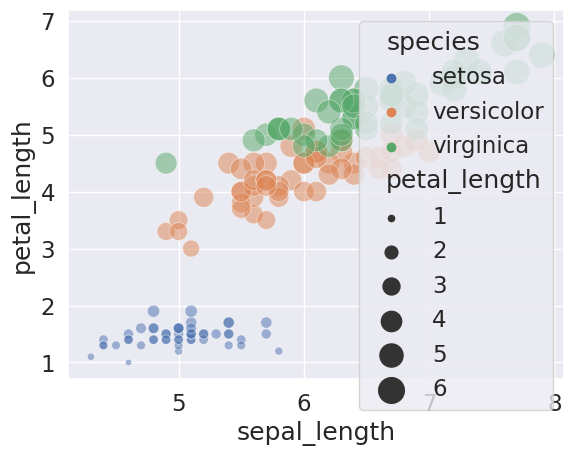

In [109]:
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species',size='petal_length',alpha=0.5, sizes=(20,400))

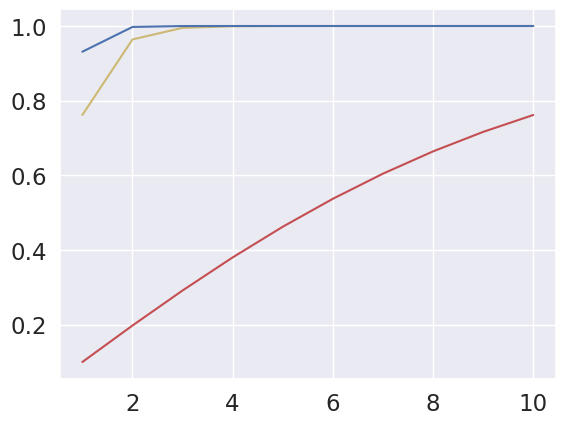

In [110]:
import numpy as np
x= np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
a=10
b=0.6
y=np.tanh(x)
y1=np.tanh(x/a)
y2=np.tanh(x/b)

plt.plot(x,y,'y')
plt.plot(x,y1,'r')
plt.plot(x,y2,'b')





### Procesamiento de datos. Numéricos

#### Escalamiento de datos: Transformacion lineal

In [111]:
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

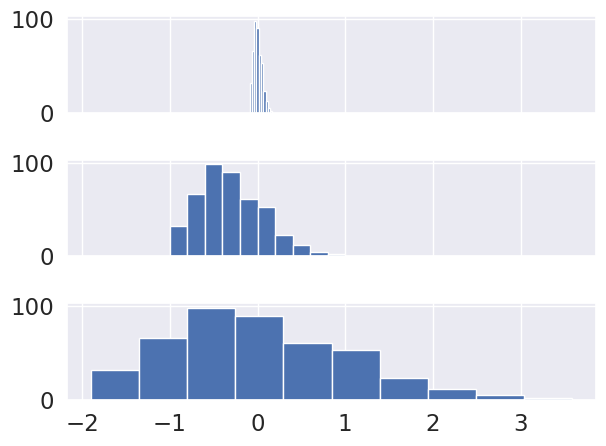

In [112]:
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

In [113]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [114]:
#Medir el tiempo que se tarda procesar los datos sin y con escalamiento 

raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.12253459700150415 
trainning time for scaled data : 0.1107798430020921
trainning time for z_scaled data : 0.08610951199079864


NOTA: max-min scaling: mejor para datos uniformemente distribuidos
z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

#### Escalamiento de datos: Transformacion No lineal

<Axes: >

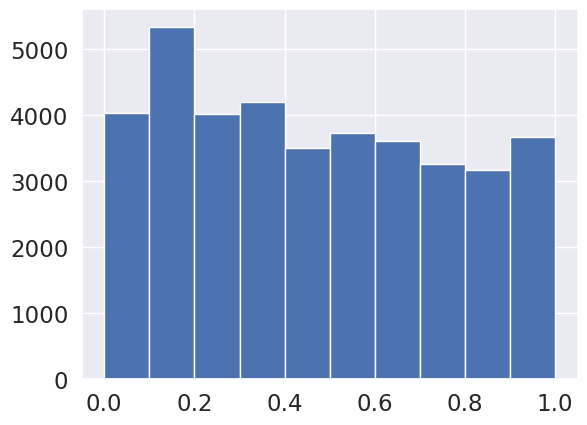

In [115]:
df.price_usd.apply(lambda x: np.tanh(x/10000)).hist()

### Procesamiento de datos: Categóricos

##### Dummy

In [116]:
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
38526,False,False,True
38527,True,False,False
38528,False,False,True
38529,False,False,True


In [117]:
import sklearn.preprocessing as preprocesing

In [118]:
encoder = preprocesing.OneHotEncoder(handle_unknown='ignore')

In [119]:
encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [120]:
encoder.transform([['gasoline'],['diesel'],['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

¿Se pueden usar variables numéricas como categóricas?

In [121]:
encoder.fit(df[['year_produced']].values)
encoder.transform([[2016],[2009],[190]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Esto queda muy pesado: por lo que se usan correlaciones por el cual se logran reducir el numero de datos con el método análisis de componentes principales

# Análisis multivariado

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

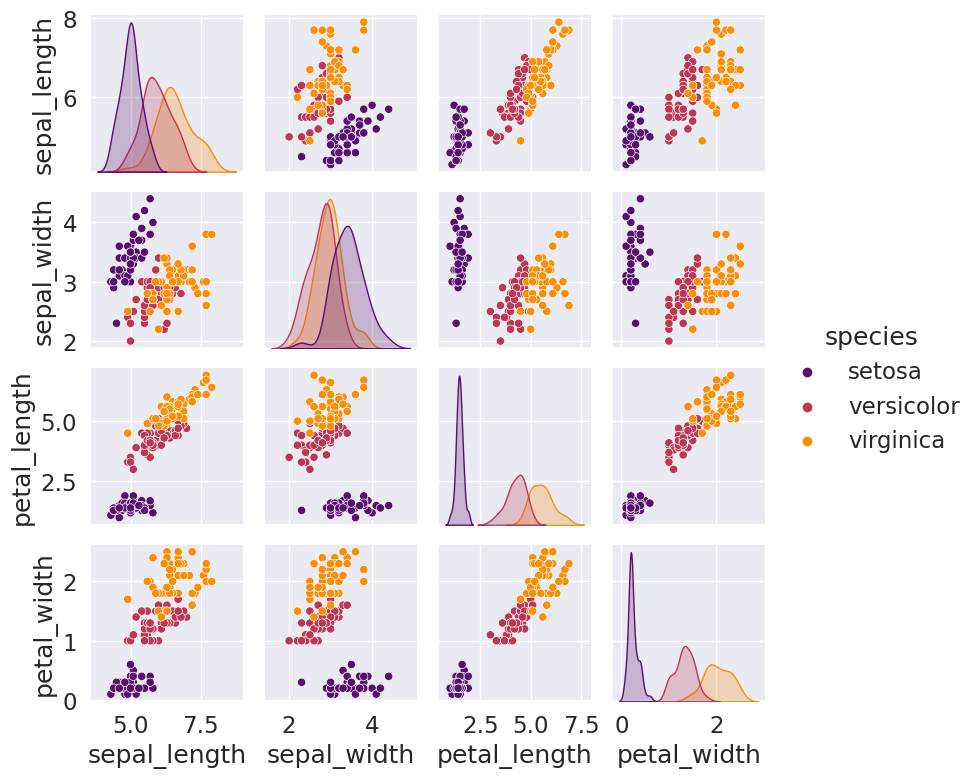

In [122]:
sns.pairplot(iris, hue='species',palette='inferno', diag_kind='kde', height=2.0)
plt.show()

### Estandarizacion de los datos

Restamos por el promedio y dividimos por la desviación estandar 

In [123]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [124]:
scaler=StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       ]]
)
scaled.T #la traspuesta de los datos escalados

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

### Matriz de covarianza

In [125]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

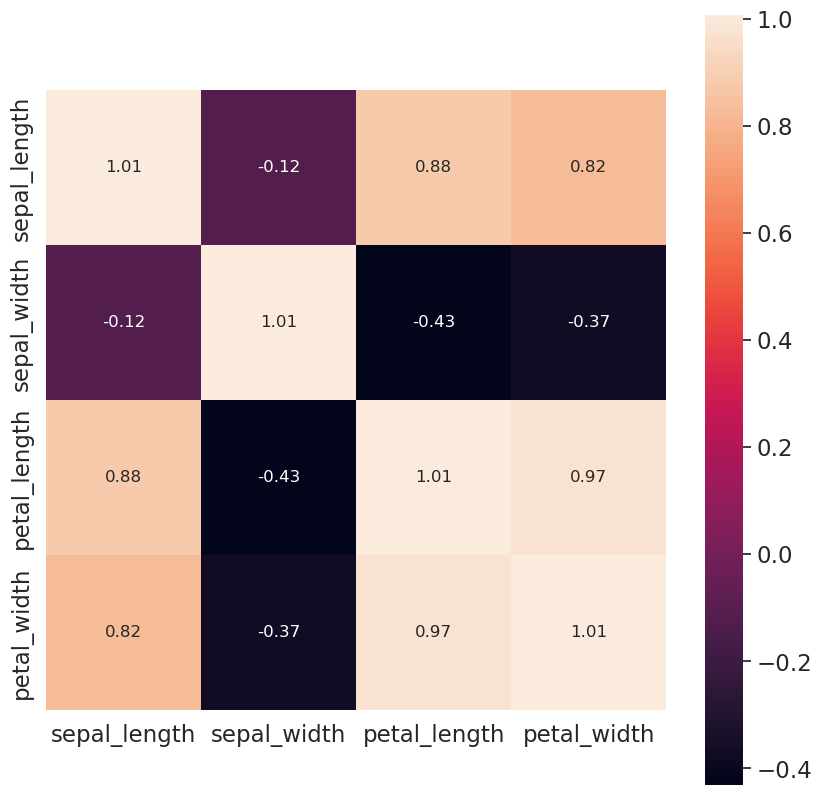

In [126]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                 xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

#### Reducción de dimensionalidad con PCA 

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

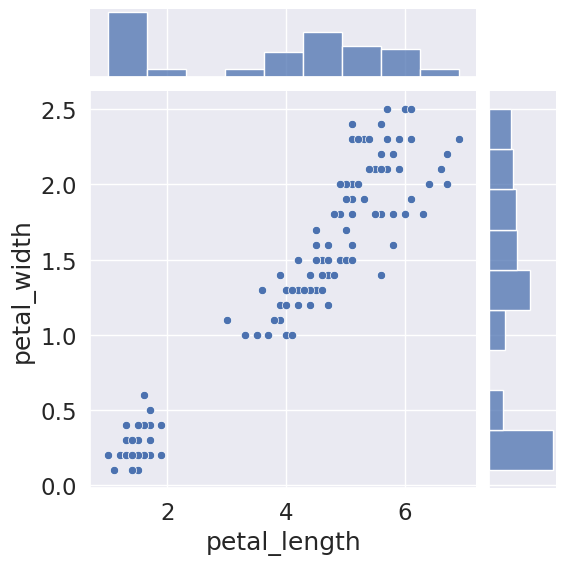

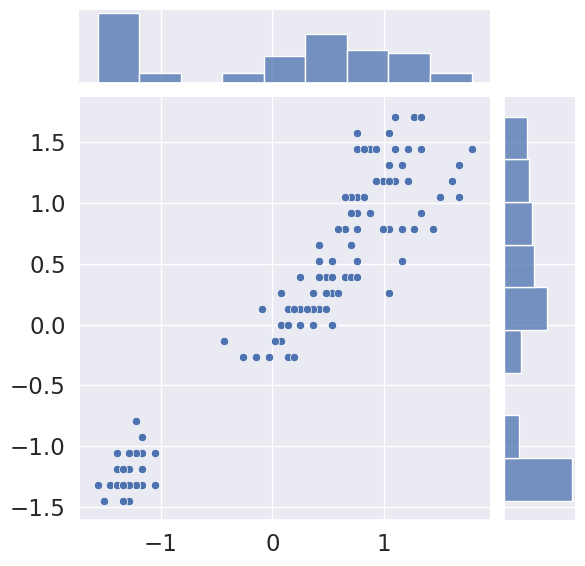

In [127]:
sns.jointplot(x= iris['petal_length'], y=iris['petal_width'])
sns.jointplot(x = scaled[:, 2], y = scaled[:,3])

Descomposicion en vectores y valores propios: 

Metodo "eig"

In [128]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

print(eigen_values)
print(eigen_vectors)

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [129]:
# es como si midiera que tanto porcentaje de informacion de los datos me queda tomando canda PCA
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)


[72.96244541329989, 22.850761786701767, 3.6689218892828825, 0.5178709107154701]


In [130]:
pca = PCA(n_components=2) #le digo a que numero de PCA llevar los datos en este caso a 2
pca.fit(scaled)

PCA(n_components=2)

In [131]:
pca.explained_variance_ratio_ #la primera captura el 72 % de la varianza y la segunda el 22%

array([0.72962445, 0.22850762])

In [132]:
reduced_scaled = pca.transform(scaled) #creo las nuevas variables y las guardo en "pca_scaled"

In [138]:
iris['pca_1'] = reduced_scaled[:,0]
iris['pca_2'] = reduced_scaled[:,1]
print(iris)


     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

        pca_1     pca_2  
0   -2.264703  0.480027  
1   -2.080961 -0.674134  
2   -2.364229 -0.341908  
3   -2.299384 -0.597395  
4   -

/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


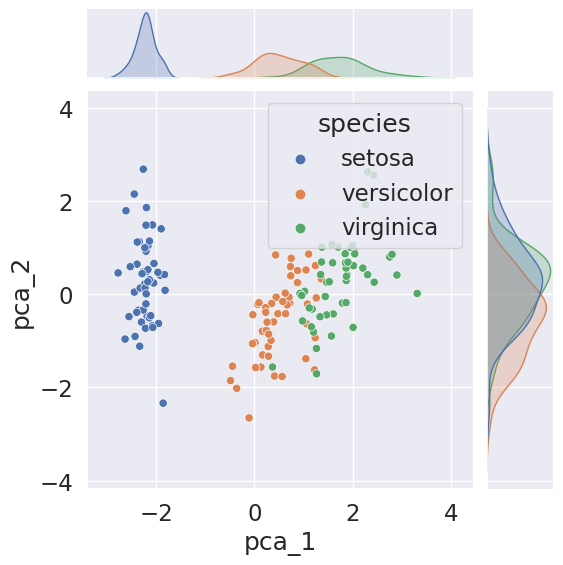

In [139]:
sns.jointplot(data=iris, x='pca_1', y='pca_2', hue='species')
plt.show()